In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
# Set the path to the dataset
train_data_dir = "/content/drive/My Drive/brain_dead_emotion_detection/Train"
test_data_dir = "/content/drive/My Drive/brain_dead_emotion_detection/Test"

In [ ]:
# Define the image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

In [ ]:
# Define the data generators for training and validation data with data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(test_data_dir,
                                                         target_size=(img_width, img_height),
                                                         batch_size=batch_size,
                                                         class_mode='categorical')

In [ ]:
# Load the pre-trained model
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [ ]:
# Freeze the layers of the base model
for layer in vgg_base.layers:
    layer.trainable = False

# Build the model architecture
model = Sequential()

model.add(vgg_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model with a lower learning rate
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
# Train the model with more epochs
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)


Found 1810 images belonging to 4 classes.
Found 369 images belonging to 4 classes.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/50
56/56 [==============================] - 367s 6s/step - loss: 1.2637 - accuracy: 0.4432 - val_loss: 1.1625 - val_accuracy: 0.4801
Epoch 2/50
56/56 [==============================] - 29s 523ms/step - loss: 0.9256 - accuracy: 0.6265 - val_loss: 0.9566 - val_accuracy: 0.5483
Epoch 3/50
56/56 [==============================] - 30s 526ms/step - loss: 0.7486 - accuracy: 0.6957 - val_loss: 0.9580 - val_accuracy: 0.5881
Epoch 4/50
56/56 [==============================] - 29s 510ms/step - loss: 0.6612 - accuracy: 0.7463 - val_loss: 0.9384 - val_accuracy: 0.5597
Epoch 5/50
56/56 [==============================] - 29s 515ms/step - loss: 0.5624 - accuracy: 0.7981 - val_loss: 0.8874 - val_accuracy: 0.6165
Epoch 6/50
56/56 [==============================] - 29s 510ms/step - loss: 0.5383 - accuracy: 0.8031 - val_loss: 0.7992 - val_accuracy: 0.6

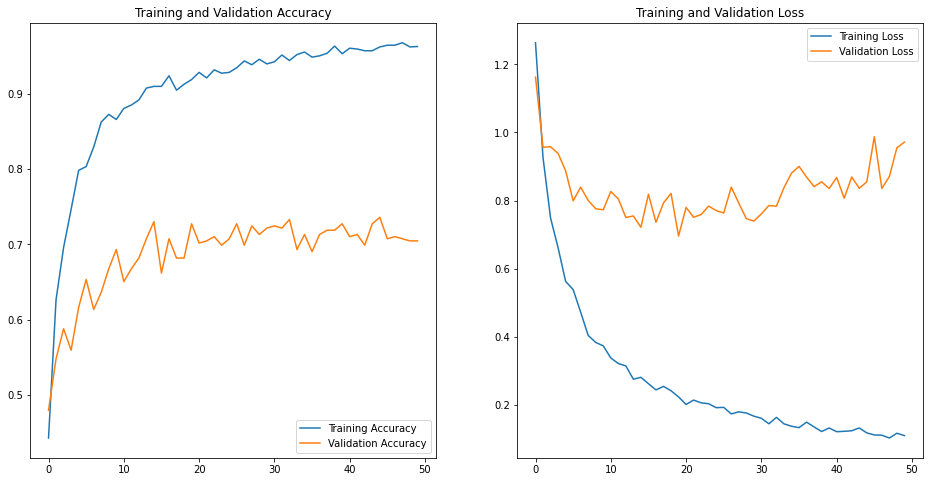

12/12 [==============================] - 4s 327ms/step - loss: 0.9723 - accuracy: 0.7073
Test Accuracy: 0.707317054271698


In [ ]:
# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(validation_generator, verbose=1)
print("Test Accuracy:", test_accuracy)